In [1]:
import sys
import os
sys.path.append("../..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet
from diachr.diachromatic_interaction import DiachromaticInteraction

## Usage of the `TIMViz` module

Interactions are represented as polygons along the genomic axis. The module is implemented here:

In [2]:
from diachr.TIMViz import TIMViz

For demonstration purposes, we have prepared an interaction file with 44 interactions and a BED file with five TAD regions.

In [3]:
INTERACTION_FILE = '../../tests/data/TIMViz_i_test_file.tsv'

In addition to the interactions, TAD regions can be displayed as gray triangles. We have prepared a test file with TAD regions:

In [4]:
TAD_BED_FILE = '../../tests/data/TIMViz_t_test_file.bed'
#TAD_BED_FILE = None

Furthermore, digests selected for enrichment can be marked with vertical and diagonal lines. We have prepared a test file with TAD regions:

In [5]:
BAIT_BED_FILE = '../../tests/data/TIMViz_b_test_file.bed'
#BAIT_BED_FILE = None

A class `TIMViz` obejct is created by passing these files to the constructor:

In [6]:
visualizer = TIMViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing TIMviz object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr10: 44 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr10: 5 TADs
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr10: 5 Baits
	[INFO] ... done.
[INFO] ... done.


After that, the method `TIMViz.create_visualization()` can be used to generate triangle interaction maps for specific regions. The only parameters required by this method are the genomic coordinates. Before a visualization, is created, the following steps are carried out:

1. First, all interactions that are located completely within the region to be visualized are extracted.

2. These interactions can be filtered by interaction category, enrichment status and highest two configuration (HTC) tag. By default, the interactions are not filtered.

3. For the remaining interactions, the quantiles `0.1` to `1.0` are determined. These are used to represent interactions with different transparency depending on their total read pair counts. For instance, in this example, all interactions with a read pair count smaller or equal `5` will be shown with a transparency of `0.1`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			22
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 9.1 15.  16.  17.  18.  19.  20.  25.8 27.9 30. ]
[INFO] ... done.


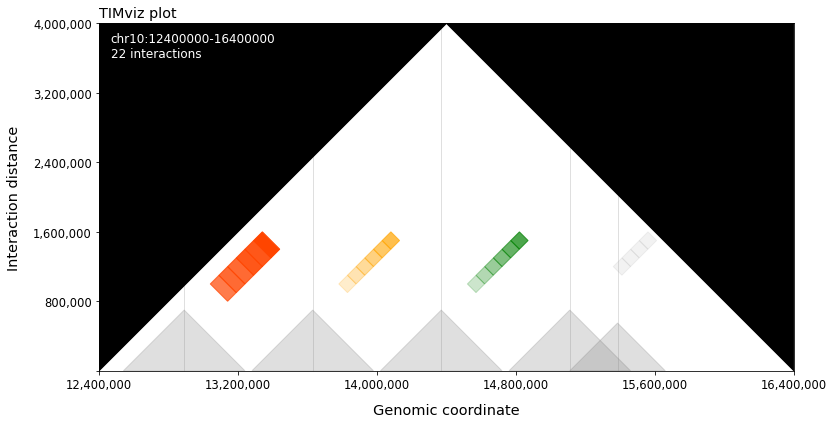

In [7]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    show_complete_annotations=False)

In priciple, this plot corresponds to a typical represenation of Hi-C interactions. The genomic coordinates are plotted on the x-axis and each colored tetragon in the triangle above represents an interaction between two genomic regions. For Hi-C data, interactions are typically grouped in bins of the same size, so that all tetragon are squares. In the representation presented here, the tetragons can also be rectangular. The edge lengths result from the length of the two digests associated with an interaction.

Interactions from different categories are shown in different colors (`DIX` in `orangered`, `DI` in `orange`, `UIR` in `green` and `UI` in `gray`). The transparency of the polygons depends on how many reads an interaction has relative to all other interactions to be displayed within the range for which a map is generated. Before we create a map, we determine the quantiles `0.1, 0.2, ..., 1.0` for the read counts of all interactions to be displayed. For a specific interaction, we then use the largest quantile that only includes read counts that are smaller than the read count of that interaction. For instance, if an interaction has a total read count that is greater than 68% of the read counts of all other interactions, then the interaction is rendered with a transparency of `0.6`. For this example, we have assigned the read pair numbers of interactions in a linearly decreasing manner. `DIX` interactions have between `21` and `30` read pairs per interaction, both `DI` and `UIR` interactions between `20` and `11` and `UI` interactions between `1` and `10`. Use `transparent_polygons=False` to render all polygons without transparency.

The TAD regions are shown as gray triangles that have a certain degree of transparency. In cases where TAD regions for different celltypes are loaded, TAD regions can also overlap. Due to the transparency, regions covered by multiple TADs appear as darker triangles. Digests that have been selected for enrichment (baited) are displayed as vertical gray lines at the center of the respective digests. Use `plot_bait_diagonals=True` to additionally highlight such digests with diagonal lines.

The interaction within the region to be visualized can be filtered. For instance, the folowing plot only contains `DI` and `UIR` interactions.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			12
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[15.1 16.  16.3 17.  17.5 18.  18.7 19.  19.9 20. ]
[INFO] ... done.


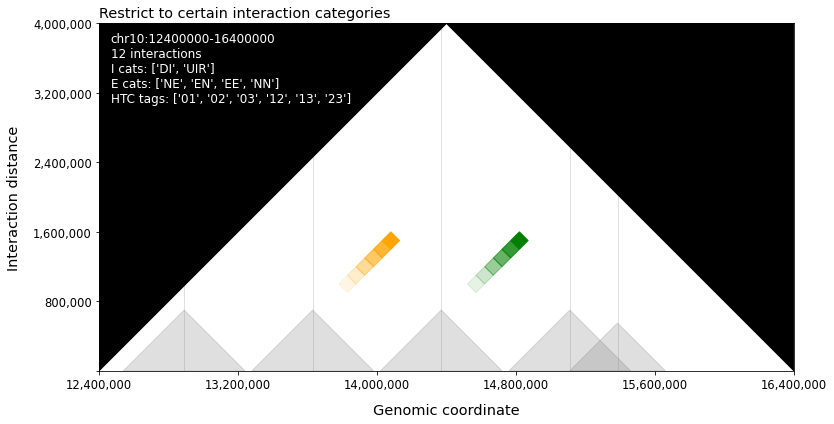

In [8]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    show_complete_annotations=True,
    plot_title = 'Restrict to certain interaction categories')

Previously, the interactions are assigned colors according to their category. In the following plot, the interactions are colored according to their HTC tags. The colors are assigned as follows:
```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```
Use `color_i_cats = False` to color interactions according to their HTC tags.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			12
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[15.1 16.  16.3 17.  17.5 18.  18.7 19.  19.9 20. ]
[INFO] ... done.


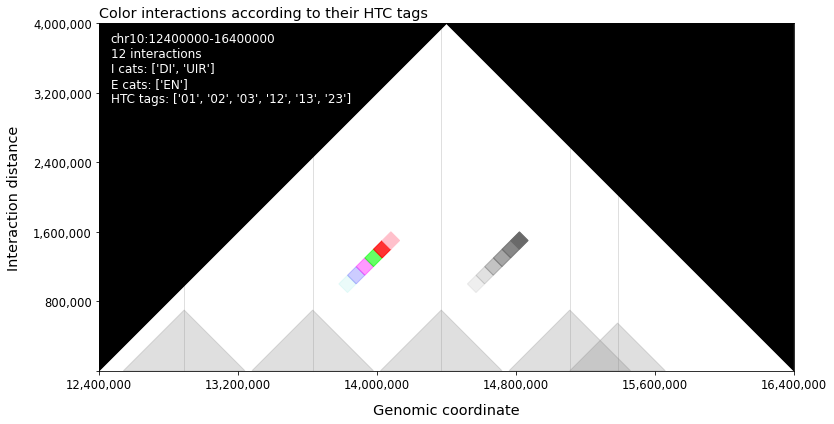

In [9]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    plot_title = 'Color interactions according to their HTC tags')

The interaction can als be filtered based on their HTC tag. The following plot shows only interactions with the tags `01` (`pink`), `02` (`red`) and `03` (`lime`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


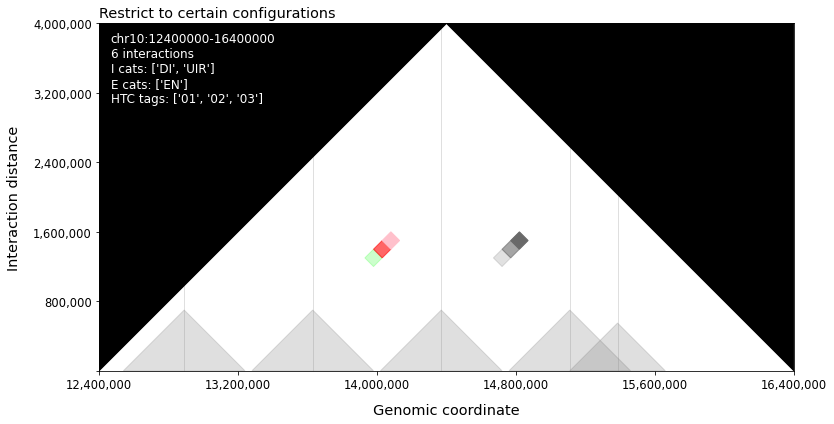

In [10]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_title = 'Restrict to certain configurations')

The baits, represented by vertical gray lines, can be additionally highlighted by diagonal lines using `plot_bait_diagonals=True`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


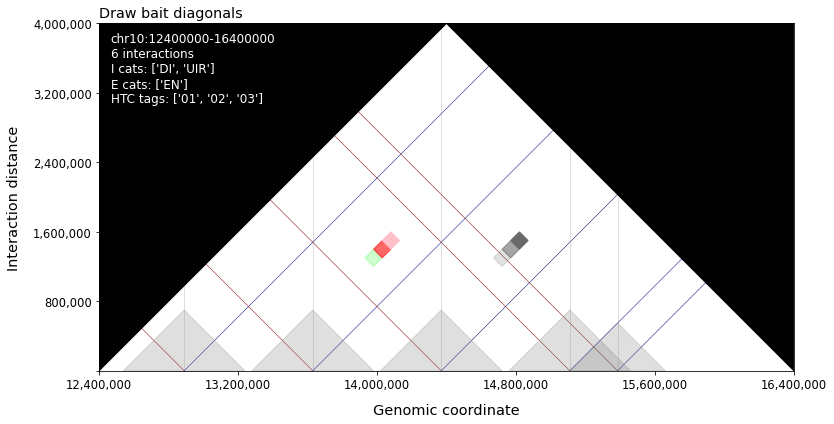

In [11]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_bait_diagonals=True,
    plot_title = 'Draw bait diagonals')

By default, the method `PolygonPatch` automatically chooses a line width for the borders of polygons. By outlining the polygons, they become more visible, which is useful when larger regions are displayed. However, this also leads to overlapping polygons that distort the representation. The parameter `pp_linewidth` van be used to control the line width yourself. A line width of `0` esures that there are no overlaps.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


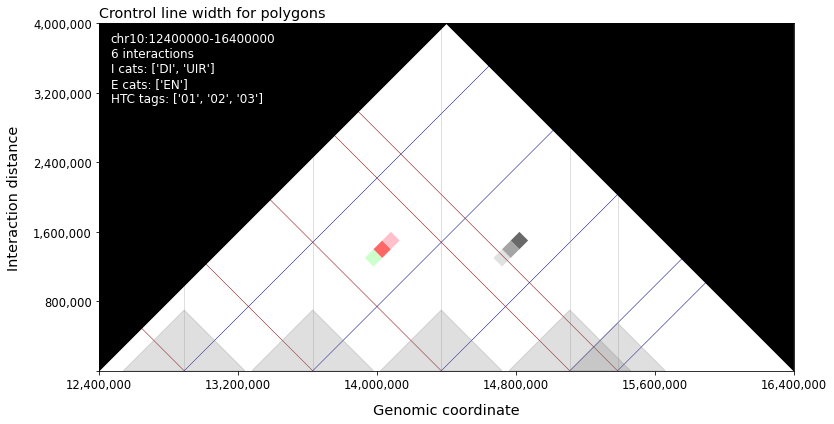

In [12]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                ht_tag_list = ['01','02','03'],
                                show_complete_annotations=True,
                                plot_bait_diagonals=True,
                                pp_linewidth=0,
                                plot_title = 'Crontrol line width for polygons')